<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [47]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-04 14:10:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  52.5MB/s    in 0.7s    

2024-07-04 14:10:53 (52.5 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



Connect to the database.


In [63]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Demo: How to run an sql query


In [50]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [51]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [52]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [53]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


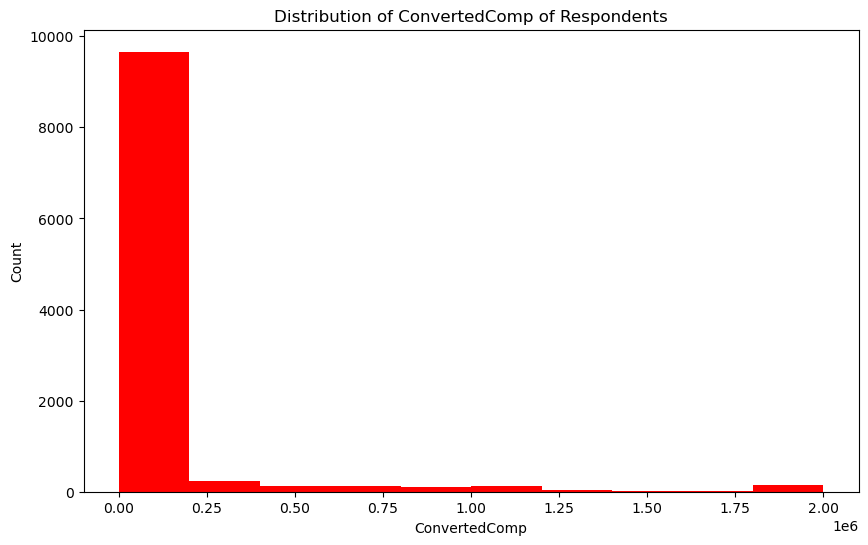

In [54]:
# your code goes here
QUERY = '''SELECT ConvertedComp FROM master'''

df_hist = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (10,6))
plt.hist(data = df_hist, x = 'ConvertedComp', bins = 10, color = 'r')

plt.title('Distribution of ConvertedComp of Respondents')
plt.xlabel('ConvertedComp')
plt.ylabel('Count')

plt.show()

### Box Plots


Plot a box plot of `Age.`


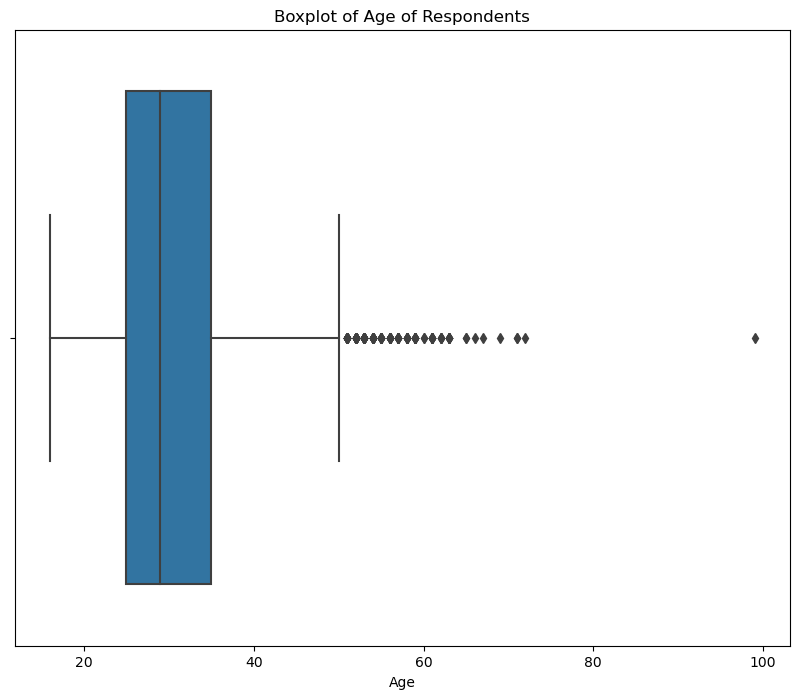

In [55]:
# your code goes here
QUERY = '''SELECT Age FROM master'''

df_box = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (10,8))

sns.boxplot(data = df_box, x = df_box['Age'])
plt.title('Boxplot of Age of Respondents')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


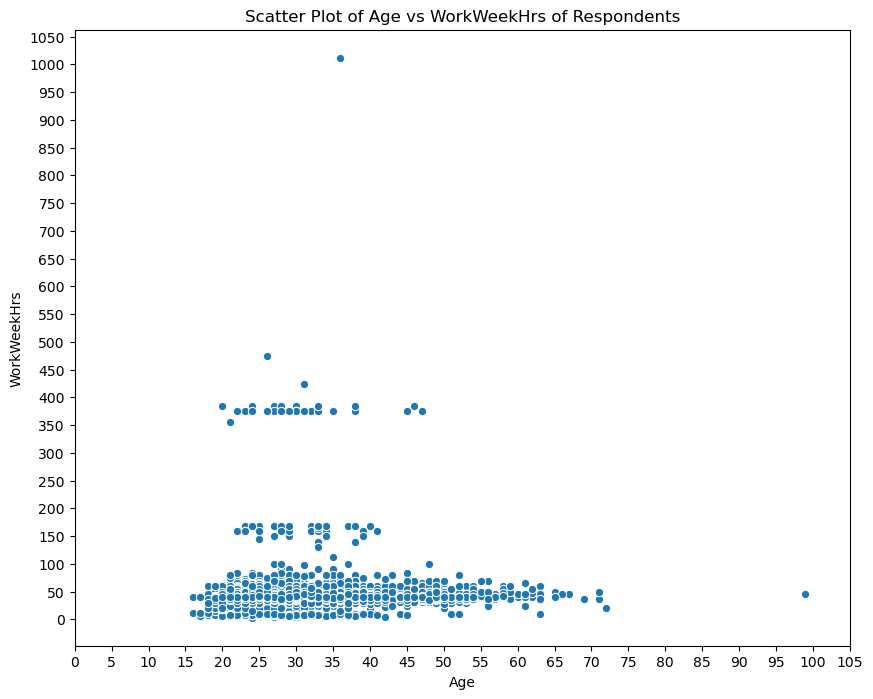

In [64]:
# your code goes here
QUERY = '''SELECT Age, WorkWeekHrs FROM master'''

df_scatter = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (10,8))
sns.scatterplot(data = df_scatter, x = 'Age', y = 'WorkWeekHrs')
plt.title('Scatter Plot of Age vs WorkWeekHrs of Respondents')
plt.yticks(np.arange(0,1100,50))
plt.xticks(np.arange(0,110,5))
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


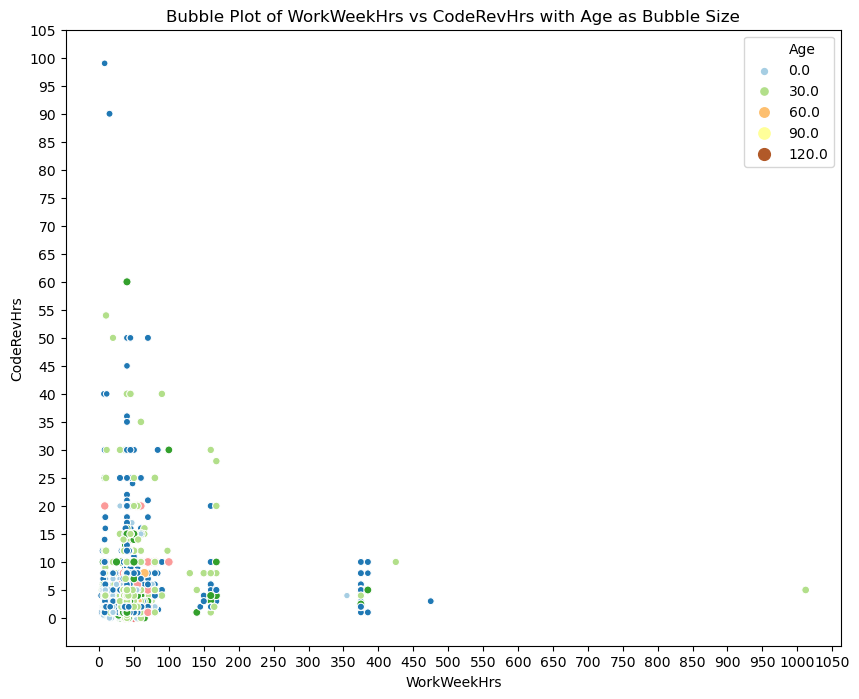

In [65]:
# your code goes here
QUERY = '''SELECT Age, WorkWeekHrs, CodeRevHrs FROM master'''

df_bubble = pd.read_sql_query(QUERY, conn)
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_bubble, x = 'WorkWeekHrs', y = 'CodeRevHrs', size = 'Age', hue = 'Age', palette = 'Paired')

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs with Age as Bubble Size')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.yticks(np.arange(0,110,5))
plt.xticks(np.arange(0,1100,50))
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


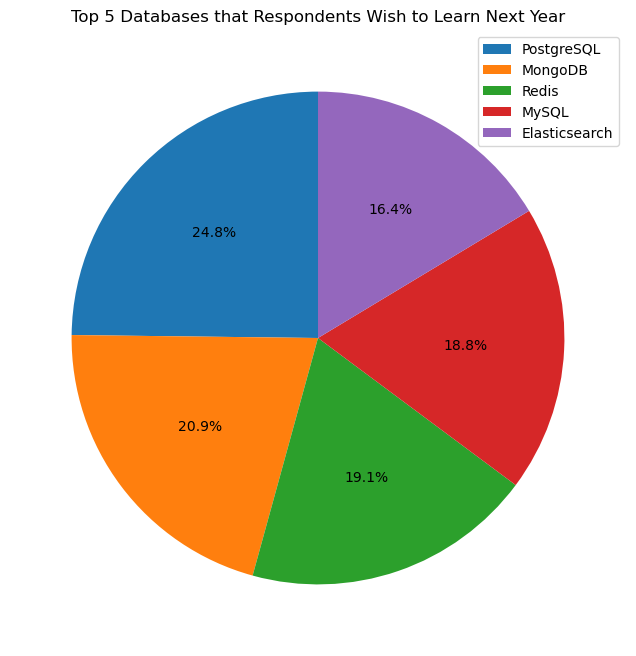

In [58]:
# your code goes here

QUERY = '''SELECT DatabaseDesireNextYear, COUNT(DatabaseDesireNextYear) AS Number_of_Respondents FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY COUNT(DatabaseDesireNextYear) DESC'''


df_pie = pd.read_sql_query(QUERY, conn)

df_pie_top5 = df_pie.iloc[0:5,]

plt.figure(figsize = (12,8))
    
df_pie_top5['Number_of_Respondents'].plot(kind ='pie', autopct = '%1.1f%%', startangle = 90, labels = None)

plt.title('Top 5 Databases that Respondents Wish to Learn Next Year')
plt.ylabel('')
plt.legend(labels = df_pie_top5['DatabaseDesireNextYear'])
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


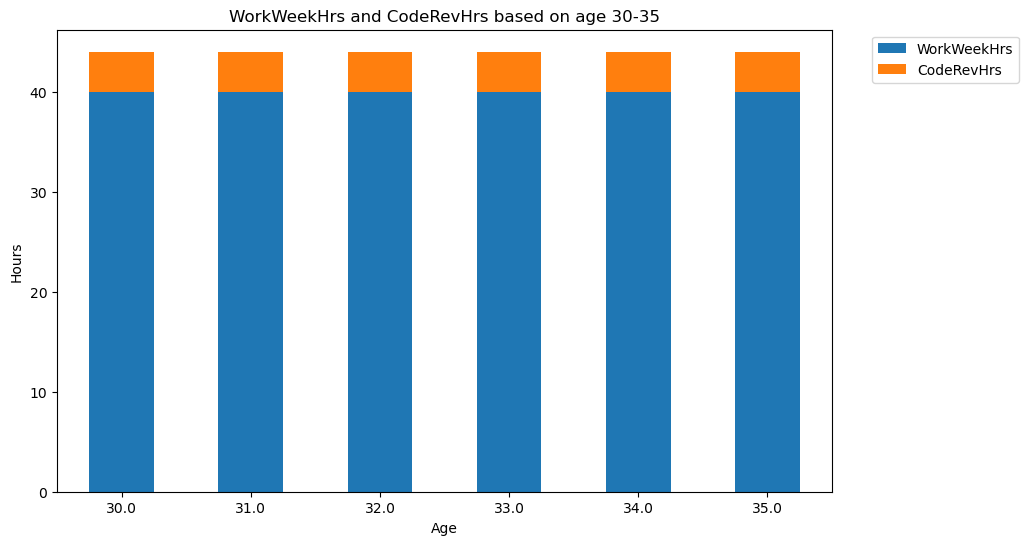

In [59]:
# your code goes here
QUERY = '''SELECT Age, WorkWeekHrs, CodeRevHrs FROM master'''

df_stacked = pd.read_sql_query(QUERY, conn)

df_stacked_grouped = df_stacked[(df_stacked['Age'] >= 30) & (df_stacked['Age'] <= 35)]

df_stacked_grouped = df_stacked_grouped.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

df_stacked_grouped.plot(kind = 'bar', stacked = True, use_index = True, figsize = (10,6))

plt.legend(loc ='upper right', bbox_to_anchor = (1.25,1))

plt.title('WorkWeekHrs and CodeRevHrs based on age 30-35')
plt.xticks(rotation = 360)
plt.ylabel('Hours')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


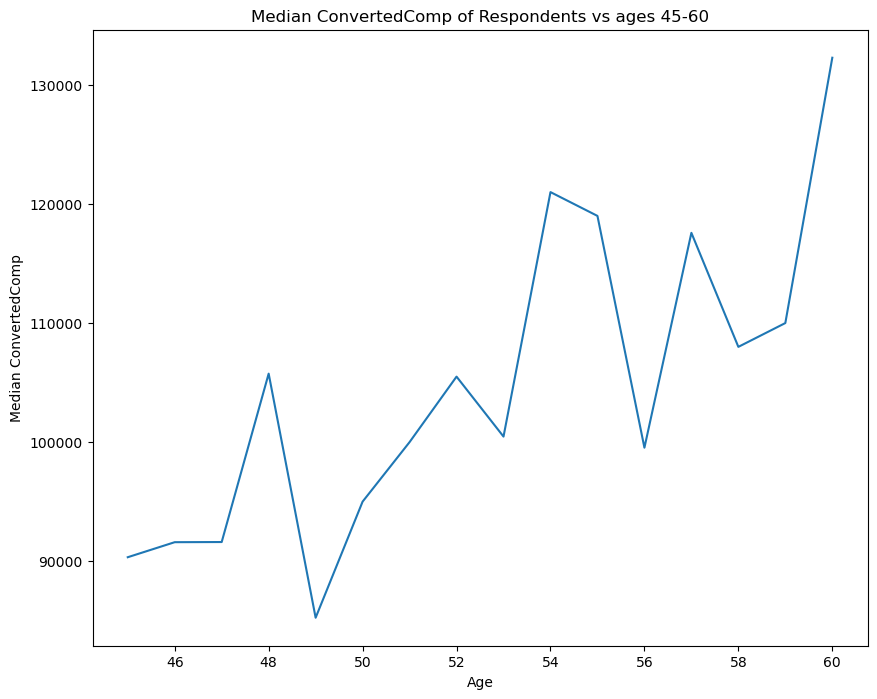

In [60]:
# your code goes here

QUERY = '''SELECT Age, ConvertedComp FROM master'''

df_line = pd.read_sql_query(QUERY, conn)

df_line_grouped = df_line[(df_line['Age'] >= 45) & (df_stacked['Age'] <= 60)]

df_line_grouped = df_line_grouped.groupby('Age')['ConvertedComp'].median()

df_line_grouped.plot(kind = 'line', x = 'Age', y = 'ConvertedComp', figsize = (10,8))

plt.title('Median ConvertedComp of Respondents vs ages 45-60')
plt.ylabel('Median ConvertedComp')
plt.xlabel('Age')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


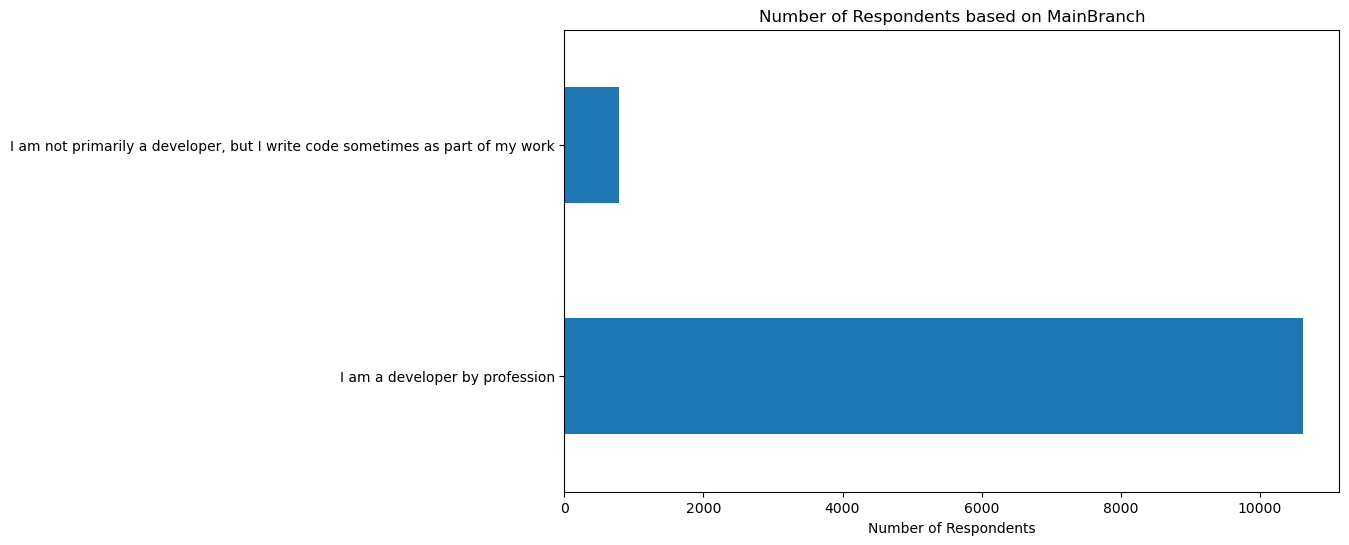

In [61]:
# your code goes here
QUERY = '''SELECT MainBranch, COUNT(MainBranch) AS Number_of_Respondents FROM master GROUP BY MainBranch'''

df_bar = pd.read_sql_query(QUERY, conn)

df_bar.plot(kind = 'barh', x = 'MainBranch', y = 'Number_of_Respondents', figsize = (10,6), legend = False)

plt.title('Number of Respondents based on MainBranch')
plt.ylabel('')
plt.xlabel('Number of Respondents')

plt.show()

Close the database connection.


In [62]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
